<div>
    <div style="float:left;width:50%;text-align:center">
        <h1>pyGIMLi Tutorial @ Transform 2021</h1>
        <div>
<table style="border-collapse:collapse;border-color:#ccc;border-spacing:0" class="tg"><thead><tr><th style="background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal"></th><th style="background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">Info</th></tr></thead><tbody><tr><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">When</td><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">Monday, April 19 • 8:00 - 9:00 UTC (starts at 10.00 a.m. CET)</td></tr><tr><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">Slack (Q&amp;A)</td><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;text-decoration:underline;vertical-align:top;word-break:normal"><a href="https://softwareunderground.org/">Software Underground</a> channel <a href="https://swung.slack.com/archives/C01T5V5S9EV">#t21-mon-pygimli</a></td></tr><tr><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">Live stream</td><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;text-decoration:underline;vertical-align:top;word-break:normal"><a href="https://youtu.be/w3pu0H3dXe8">https://youtu.be/w3pu0H3dXe8</a></td></tr><tr><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">pyGIMLi documentation</td><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;text-decoration:underline;vertical-align:top;word-break:normal"><a href="https://www.pygimli.org/documentation.html">https://www.pygimli.org/documentation.html</a></td></tr></tbody></table>
        </div>
    </div>
    <div style="float:right;width:30%">
        <img src="https://www.pygimli.org/_images/pg_logo.png" alt="pyGIMLi logo">
    </div>
</div>

# Inversion settings: Inverting electrical resistivity field data

In [9]:
import matplotlib.pyplot as plt
import pygimli as pg
from pygimli.physics import ert  # the module

We first load a sample data file

In [2]:
data = pg.getExampleFile('ert/slagdump.ohm', load=True, verbose=True)
#data = pg.DataContainerERT("data/beach.dat")
print(data)

17/04/21 - 23:24:04 - pyGIMLi - INFO - Getting: C:\Users\halbm\AppData\Local\Temp\gimli-org/example-data/ert/slagdump.ohm


C:\Users\halbm\AppData\Local\Temp\gimli-org/example-data/ert/slagdump.ohm
Data: Sensors: 38 data: 222, nonzero entries: ['a', 'b', 'm', 'n', 'r', 'valid']


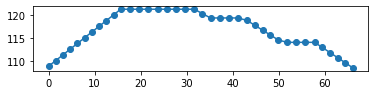

In [12]:
fig, ax = plt.subplots()
ax.plot(pg.x(data), pg.z(data), 'o-')
ax.set_aspect(1.0)

There is some significant topography.

From the output see that the file hold, additionally to current and potential electrodes, only ohmic resistances. We need a geometric factor to convert them into apparent resistivities.

In [4]:
data['k'] = ert.createGeometricFactors(data, numerical=True)

17/04/21 - 23:29:09 - pyGIMLi - INFO - Save RVector binary
17/04/21 - 23:29:09 - pyGIMLi - INFO - Cache stored: C:\Users\halbm\AppData\Roaming\pygimli\Cache\14061829023104387062


Additionally we compute an analytical geometric factor based on a flat-earth assumption. We are going to show the geometric effec, i.e. the ratio of both geometric factors (Rücker et al. 2006).

17/04/21 - 23:41:54 - pyGIMLi - INFO - Cache c:\msys64\home\halbm\gimli\gimli\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 3): C:\Users\halbm\AppData\Roaming\pygimli\Cache\15524818543599632486


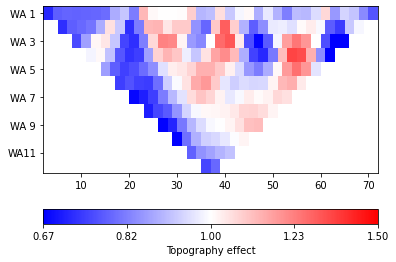

In [13]:
k0 = ert.createGeometricFactors(data)
ert.show(data, vals=k0/data['k'], label='Topography effect',
        cMap="bwr", cMin=0.67, cMax=1.5, logScale=True);

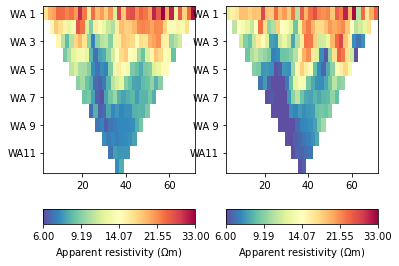

In [22]:
kw = dict(cMin=6, cMax=33, logScale=True)
fig, ax = plt.subplots(ncols=2)
data["rhoa"] = data["r"] * data["k"]
ert.show(data, data["rhoa"], ax=ax[0], **kw);
ert.show(data, data["r"] * k0, ax=ax[1], **kw);

Apparently, part of the anomalies is of geometric origin and gone if the correct geometric factors are used.
For inversion, we need an error estimate, i.e. retrieved from reciprocal analysis. Errors usually consist of a relative error and an absolute error (voltage gain). Here we assume typical values of 3% and 

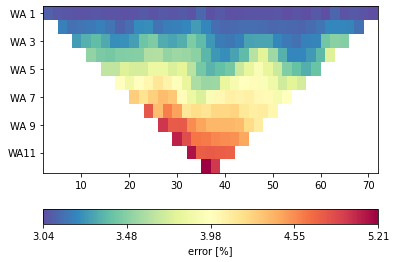

In [26]:
data['err'] = ert.estimateError(data, 
                                absoluteUError=0.0001, 
                                relativeError=0.03)
ert.show(data, data['err']*100, label="error [%]");

In [27]:
ert.invert(data, lam=10,
           paraDX=0.3, paraMaxCellSize=10, paraDepth=20, quality=34)
ert.showResult()

AttributeError: module 'pygimli.physics.ert' has no attribute 'invert'